# Lab 4 

In this lab, we will be faced with a regression problem. We have to guess the age of abalone(a type of marine snail) based on other given data. 

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('abalone.data',sep = ' ')

In [2]:
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age(rings)
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age(rings)
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
len(data)

4177

In [5]:
data.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'age(rings)'],
      dtype='object')

## Data Exploration


In regression analysis, the visualization plays a huge part in the steps ahead, more than classification, because ultimately the labels will be an unbound numerical value. In classification, there will be a finite number of different classes/labels. In regression, however, the output can be any numerical value. 

### Task 1: Numerical variable analysis

Correlation plays a huge part in deciding the output of a regression problem. The more correlated a variable is to the target variable, the more important it is as a feature for training the model. 

Q1. Create a scatter plot with a linearly regressive line between length and age(rings).

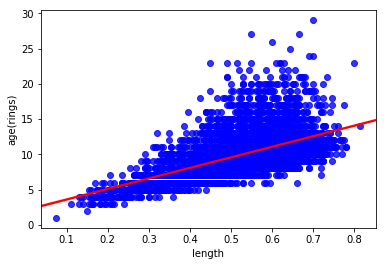

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#TODO
sns.regplot(logx=False,scatter_kws={"color": "blue"}, line_kws={"color": "red"},x=data['length'],y=(data['age(rings)']),order=1)
plt.show()

Q2. Create a scatter plot with a polynomial best fit line of order 2 between whole_weight and age(rings).

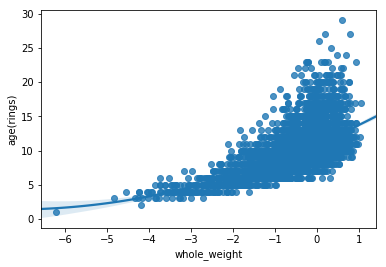

In [5]:
#TODO
sns.regplot(x=np.log(data['whole_weight']), y = data['age(rings)'],order=2)
plt.show()

Q3. Create a diagonal correlation heatmap, with the correlation method being Kendall rank correlation, and ensure that the correlation values are annotated on the heatmap.

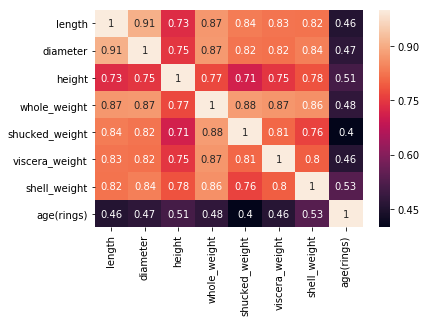

In [6]:
#TODO
corr = data.corr(method='kendall')
sns.heatmap(corr,annot=True)

plt.show()

Q4. Create a FacetGrid which shows two scatterplots between diameter and age(rings), one for each sex.

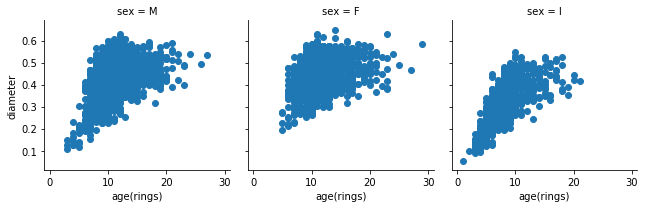

In [7]:
#TODO
g = sns.FacetGrid(data,col='sex')
g = (g.map(plt.scatter,'age(rings)','diameter').add_legend())
plt.show()

Q5. Feel free to try out other visualizations.

In [8]:
#TODO

plt.show()

## Feature Engineering 

Using all features in a problem like this increases dimensionality, which not only makes computation slow, but can prevent the model reaching peak performance.

### Task 2: Feature Selection

Q6. Select an appropriate number of features for the training data, and assign it to variables. In case you want to use categorical data, remember to one-hot encode. 

In [18]:
data.head()


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age(rings)
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [19]:
#TODO
categorical_var = ['sex']
numerical_variables = ['diameter','shell_weight','viscera_weight','height']

In [20]:
X = pd.get_dummies(data,categorical_var)

In [12]:
X.drop(['length','whole_weight','shucked_weight'],axis=1,inplace=True)

### Task 3:Feature Scaling

Q7. Do the necessary scaling on the data.

In [22]:
y = X['age(rings)']
X.drop(['age(rings)'],axis=1,inplace=True)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)


In [24]:
#TODO
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)


In [25]:
X_test = scaler.transform(X_test)

## Model Selection and Training

Q8. Split training and testing set.

In [ ]:
#TODO



### Task 4: Defining Performance Metrics

It must be remembered that different types of machine learning problems carry different evaluations metrics. Therefore for regression, we cannot have metrics like precision and accuracy, which belong to classification tasks, to evaluate a model. We will analyze our model with 3 metrics: Root mean squared error, R2-score(coefficient of determination), and explained variance score.

Q9. Complete the function below, which returns the above mentioned metrics. Import the necessary tools via scikit-learn

In [26]:
#TODO

from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score

def performance_metrics(y_true,y_pred):
    rmse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true,y_pred)
    explained_var_score = explained_variance_score(y_true,y_pred)
    
    return rmse,r2,explained_var_score



### Task 5: Model Selection

Finally, we select a model and train it. One note to keep in mind, now that we are working on a regression problem, remember that we will be using Regressors, not Classifiers. 

Q10. Instantiate any Regressor, such as DecisionTreeRegressor, and train it on the training data.

In [27]:
from xgboost import XGBRegressor

In [28]:
XGBReg = XGBRegressor()

In [29]:
XGBReg.fit(X_train,y_train)
y_pred = XGBReg.predict(X_test)

rmse,r2,explained_var_score = performance_metrics(y_test,y_pred)

print("Root mean squared error:{} \nR2-score:{} \nExplained variance score:{}".format(rmse,r2,explained_var_score))

Root mean squared error:4.815389475378273 
R2-score:0.5446097777479717 
Explained variance score:0.5446137220028124


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

estimator = XGBReg
param_grid = {'max_depth':[2,4,6,8,10],'learning_rate':[0.1,0.05,0.5],'n_estimators':[50,100,200,400,500],'n_jobs':[3]}
scorer = make_scorer(mean_squared_error)
grid = GridSearchCV(estimator=estimator,param_grid=param_grid,scoring=scorer,cv=3)
grid_fit = grid.fit(X_train,y_train)
best_clf = grid_fit.best_estimator_



In [30]:
y_pred = best_clf.predict(X_test)
mse,r2,explained_var_score = performance_metrics(y_test,y_pred)

print("Root mean squared error:{} \nR2-score:{} \nExplained variance score:{}".format(rmse,r2,explained_var_score))

Root mean squared error:5.2933091765141755 
R2-score:0.31166698272615334 
Explained variance score:0.3125850649060411


In [22]:
#TODO
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()


NameError: name 'y_pred' is not defined

Q11. Generate predictions from the validation set, and output the above-mentioned scores.

In [64]:
#TODO
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

rmse,r2,explained_var_score = performance_metrics(y_test,y_pred)

print("Root mean squared error:{} \nR2-score:{} \nExplained variance score:{}".format(rmse,r2,explained_var_score))

Root mean squared error:5.586985645933014 
R2-score:0.4436350577883348 
Explained variance score:0.44858569910379786


### Task 6: Hyperparameter Tuning

We will use GridSearchCV for this.

Q12. Perform Grid Search over your model, choosing any one of the above-mentioned performance metrics as a scoring function. Choose any hyperparameters(depends on your regressor), and tune your model.

In [70]:
#TODO
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

estimator = regressor
parameters = {'max_depth':[5,10,15,20],'n_estimators':[8,16,32,64,128]}
scorer = make_scorer(mean_squared_error)
grid = GridSearchCV(estimator=estimator,param_grid=parameters,scoring=scorer)
grid_fit = grid.fit(X_train,y_train)
best_clf = grid_fit.best_estimator_

Q13. Output the above-mentioned scores for the optimized model(generate predictions on validation set), and print the optimal parameter values for the model(e.g. for DecisionTreeRegressor, print the optimal value of max_depth if you have iterated over it in GridSearch).

In [74]:
#TODO
y_pred_op = best_clf.predict(X_test)

rmse_op,r2_score_op,explained_var_score_op = performance_metrics(y_test,y_pred_op)

op_params = best_clf.get_params()

print("Root mean squared error:{} \nR2-score:{} \nExplained variance score:{}".format(rmse_op,r2_score_op,explained_var_score_op))
print("\n\nOptimal parameter values:{}".format(op_params))

Root mean squared error:5.567671548437576 
R2-score:0.4455584002520374 
Explained variance score:0.4490798602460152


Optimal parameter values:{'bootstrap': True, 'criterion': 'mse', 'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 8, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Q14. Try other models, and try to improve your scores.